In [1]:
# !pip install textblob
# !pip install pyLDAvis
# !pip install mpld3
# !pip install chart-studio

In [2]:
import pandas as pd
import numpy as np
import re
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
from collections import Counter
import sklearn.feature_extraction.text as text
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
import gensim
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
from nltk.tag import pos_tag
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import heapq
import warnings
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from gensim.models import doc2vec
from gensim.models.doc2vec import TaggedDocument


from gensim.models.doc2vec import Doc2Vec
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import plotly 


import chart_studio
import chart_studio.plotly as py
import plotly.graph_objects as go
chart_studio.tools.set_credentials_file(username='hassaankhhan', api_key='nnhzCw0lRPdfTkNuEviq')

import matplotlib.pyplot as plt

from sklearn.manifold import MDS
import pyLDAvis
import mpld3
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
import nltk
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
#import plotly.graph_objs as go

#import pyLDAvis


%matplotlib inline

warnings.filterwarnings('ignore')

C:\Users\USER\anaconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [3]:
x = []
movies_list = []
movie_labels = []
import re
import glob
for filename in glob.glob('*.srt'):
    movie_labels.append(filename)
    with open(filename, encoding="utf-8") as f:
        print(filename)
        data = ''.join(i for i in f.read() if not i.isdigit())
    #lines = (line.rstrip() for line in f)
    #lines = (line for line in lines if line) 
    
        txt = data.split("\n")
        filtered = filter(lambda x: not re.match(r'^\s*$', x), txt)
    for line in filtered:
        #a = 1
        #print(line)
        line = re.sub(r'::, --> ::,','', line)
        line = re.sub(r'<font color="#ffff" size=>www.moviesubtitles.org</font>','',line)
        line = re.sub(r'\ufeff','', line)
        line = re.sub(r'Subtitle created by <font color="#ffff">- Aorion -</font>','',line)
        line = re.sub(r'</font>','', line)
        line = re.sub(r'<font color="#ffba">','', line)
        line = re.sub(r'<i>','', line)
        line = re.sub(r'</i>','', line)
        line = re.sub(r'Translated by Has_World','',line)
        
#         line = re.sub(r'<font face="Comic Sans MS">','',line)
        
        #line = re.sub(r'  Sync and corrections by explosiveskull www.addiced.com  ','',line)

        #line = line.strip()
        #line = "".join(line)
        x.append(line)
#         print(data)


        h = " ".join(line for line in x)
    movies_list.append(h)
    x = []
#     data
#     print(x)
#     print(movies_list)

10 Cloverfield Lane.BrRip.en.srt
12 Years A Slave.PublicHD.en.srt
Amazing Spider Man 2 The.Bluray.BLOW.en.srt
American Sniper (2014).DVDScr.en.srt
Annabelle.WEB-DL.RARBG.en.srt
Ant Man.SHERiF.en.srt
Argo (2012).720p.en.srt
Avengers The (2012).TS.sC0rp.en.srt
Babadook The.720p.BlueRay.AMIABLE.en.srt
Batman v Superman Dawn of Justice (2016).HD-TS.CM8.en.srt
Birdman.WEB-DL.RARBG.en.srt
Black Mass.WEBRip.SS.en.srt
Blair Witch.HD-TS.CPG.en.srt
Blended.Bluray.SPARKS.en.srt
Boyhood.Bluray.YIFY.en.srt
Captain America The Winter Soldier.SPARKS.en.srt
Chappie.720p.BlueRay.YIFY.en.srt
Conjuring The (2013).JYK.en.srt
Creep.WEB-DL.en.srt
Dark Knight The Batman The Dark Knight .720p.ESiR.en.srt
Dark Stranger The.WEB-DL.FGT.en 2.srt
Dark Stranger The.WEB-DL.FGT.en 3.srt
Dark Stranger The.WEB-DL.FGT.en.srt
Divergent.Bluray.SPARKS.en.srt
Django Unchained (2012).DVDScr.ETRG.en.srt
Doctor Strange.HD-TS.CPG.en.srt
Edge Of Tomorrow.Bluray.YIFY.en.srt
Everest.HDRip.RARBG.en.srt
Exorcism Of Emily Rose The (2

In [4]:
movies_y = [0,0,1,2,3,1,3,2,3,2,4,0,1,4,0,2,2,3,3,3,0,0,0,
            1,2,2,2,0,3,3,2,4,1,0,2,1,5,0,0,3,4,1,2,3,2,4,1,4,
            5,1,0,0,2,3,1,5,4,4,0,1,2,5,1,5,5,5,2,4,0,1,3,4,4,
            3,3,1,0,3,4,2,3,0,2,0,5,2,1,4,1,4,3,3,2,2,0,0,1,5,4,1]

In [5]:
print(len(movie_labels))
print(len(movies_y))

100
100


## EDA

In [6]:
dict_movies = Counter(movies_y)
dict_movies
# ['Drama', 'Mystery/Adventure', 'Action','Thriller','Romance/Comedy','Scifi']

Counter({0: 20, 1: 18, 2: 20, 3: 18, 4: 15, 5: 9})

In [7]:
y = []
for genre,movies in dict_movies.items():
    y.append(movies)
y

[20, 18, 20, 18, 15, 9]

In [8]:
fig = {
    'data': [{'labels': ['Drama', 'Mystery/Adventure', 'Action','Thriller','Romance/Comedy','Scifi'],
              'values': [20,18,20,18,15,9],
              'type': 'pie'}],
    'layout': {'title': 'Movie Genres Distribution'}
     }

py.iplot(fig)

## Using 100 movies on 6 genres 

In [9]:
stopped_english = []
stopped_english = stopwords.words('english')
tokenizer = RegexpTokenizer(r'\w+')        #splitting words into tokens
for i in movies_list:                     # iterating over list and converting to lower
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in stopped_english] #stores resulting list into stopped_tokens after removing stopwords
not_needed = ['oh','know','right','hey','well','gonna','okay','try','go','hopps','yeah','got','get','one','want'
             ,'sir','judy','yes','think','come','like','everyhing','see','fox','please','zootopia','thank','cop',
             'uh','could','give','bye','nick','otterton','look','going','never','day','keep','let','us','hmm','mmm',
             'tell','make','new','say','emmitt','huh','whoa','even','mr','zpd','run','way','much','start','two','thought',
             'making','talking','place','may','thing','call','though','said','bogo','carrot','went','sorry','sure',
             'nice','done','name','gotta','ever','hello','ugh','since','listen','h','everybody','still','till','called',
             'tundratown','bad','everyone','bellwether','every','another','fine','hi','butt','remember','always','wilde',
             'boy','guy','wow','trying','end','word','saw','together','put','reach','made','nangi','dad','excuse',
             'told','enough','talk','wanted','care','looking','family','things','looks','doug','getting','nothing',
             'em','baby','gazelle','someone','wrong','cams','humped','rug','ha','might','maybe','face','um','open','pen',
             'hit','buddy','work','whatever','jerk','rainforest','jaguar','bit','none','tax','heard','jude','important',
             'deal','police','around','sheep','kid','red','weasel','ah','gone','feel','aw','camel','hero','mime','popsicles',
             'assistant','without','pop','along','skunk','pay','stu','hut','mrs','fluff','probably','away','next','starts',
             'questions','cut','half','ho','cannot','else','ways','pal','sahara','wanna','long','small','donut','catch',
             'lot','welcome','finally','use','seem','watch','daddy','gosh','whoopsie','line','part','sent','beat','foxes',
             'ooh','right','left','mama','jumbo','bon','seen','anymore','ago','write','far','tujunga','dna','dickens',
             'holicithias','baa','delgato','nicholas','bears','ask','meh','higgins','lion','bunnyburrow','fangmeyer',
             'gid','mom','rabbits','tuh','ow','benjamin','snarlov','weaselton','om','father','midnicampum','mchorn','boss',
             'daughter','woo','podunk','yay','fuck','fucking','dr','shit','mommy','ok','mm','ass','goddamn','john','dude']
stopped_english.extend(not_needed)
tagged = pos_tag(stopped_tokens)
#propernouns = [word for word,pos in tagged if pos == 'NNP' and pos == 'VB']
propernouns = [word for word,pos in tagged if pos == 'NNP' and pos == 'NNPS']
stopped_english.extend(propernouns)

## Plot of part of speech taggings , to determine the words to not be considered like prepositions(IN) etc.

In [10]:
a = []
for word,pos in tagged:
    a.append(pos)
    dict1 = Counter(a)
# /////////////////////
x = []
y = []
for key,value in dict1.items():
    x.append(key)
    y.append(value)   
# /////////////////////
data = [go.Bar(
            x=x,
            y=y
    )]
py.iplot(data, filename='pos-bar')

## Plot of 10 most occuring words , apart from the stop words in stopped_english 

Removing most occuring words rather than stop words

In [11]:
x = []
y = []
a = Counter(stopped_tokens)
for key,value in a.most_common(10):
    x.append(key)
    y.append(value)   
# ////////////////////////////////
data = [go.Bar(
            x=x,
            y=y
    )]
py.iplot(data, filename='pos-bar')

## NMF COUNT VECTORIZER

In [12]:
vectorized = CountVectorizer(max_features=200,max_df=0.8,min_df=0.2,stop_words=stopped_english,ngram_range=(1,4))
docterm = vectorized.fit_transform(movies_list)
print(docterm.shape)
# ///////////////////////////
model = NMF(init="nndsvd",
            n_components=6,
            max_iter=200)
W = model.fit_transform(docterm)
H = model.components_
print(W.shape)
print(H.shape)
# ///////////////////////////
terms = [""] * len(vectorized.vocabulary_)
for term in vectorized.vocabulary_.keys():
    terms[vectorized.vocabulary_[term]] = term
print(terms[-5:])

# //////////////////////////
for topic_index in range(H.shape[0]):
    top_indices = np.argsort(H[topic_index,:])[::-1][0:10]
    term_ranking = [terms[i] for i in top_indices]
    print("Topic {}: {}".format(topic_index, ", ".join(term_ranking)))

(100, 200)
(100, 6)
(6, 200)
['woman', 'working', 'worry', 'year', 'young']
Topic 0: men, war, hell, five, agent, door, minutes, case, killed, speaking
Topic 1: guys, house, party, school, cool, fun, kids, happy, honey, friends
Topic 2: jack, wish, house, room, five, door, girl, alone, white, wife
Topic 3: alright, color, guys, problem, power, easy, human, fire, top, team
Topic 4: mark, friends, guys, party, problem, business, also, money, school, asked
Topic 5: roll, lord, black, damn, children, year, free, white, pick, speak


## NMF TFIDF

In [13]:
tfidf = TfidfVectorizer(max_features=200,max_df=4,min_df=2,stop_words=stopped_english,ngram_range=(1,4))
docterm1 = tfidf.fit_transform(movies_list)
# /////////////////////////////////////
new_model = NMF(init="nndsvd",
            n_components=6,
            max_iter=200)
W = new_model.fit_transform(docterm1)
H = new_model.components_
terms = [""] * len(vectorized.vocabulary_)
for term in vectorized.vocabulary_.keys():
    terms[vectorized.vocabulary_[term]] = term
# /////////////////////////////////////
for topic_index in range(H.shape[0]):
    top_indices = np.argsort(H[topic_index,:])[::-1][0:10]
    term_ranking = [terms[i] for i in top_indices]
    print("Topic {}: {}".format(topic_index, ", ".join(term_ranking)))

Topic 0: mine, water, drink, wake, alone, minute, pick, town, week, minutes
Topic 1: quite, ahead, times, sometimes, killed, case, also, law, alright, agent
Topic 2: point, scared, boys, anyone, brother, change, children, car, hour, school
Topic 3: death, city, tomorrow, walk, somebody, question, killed, alright, reason, law
Topic 4: matter, touch, party, lord, different, chance, happening, speaking, died, true
Topic 5: cool, phone, easy, dark, side, dream, five, system, crazy, men


## LDA using count vectorizer

In [14]:
cv = CountVectorizer(max_features=200,max_df=0.8,min_df=0.2,stop_words='english',ngram_range=(1,4))
#vectorized = cv.fit_transform(movies_list)
# //////////////////////////////////////////
lda = LatentDirichletAllocation(n_components=6,
                                max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
#                                 random_state=42
                               )
# //////////////////////////////////////////
docterm = cv.fit_transform(movies_list)
print(lda.fit(docterm))
# //////////////////////////////////////////
def print_top_words(model, feature_names, n_top_words=20):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

print("Topics in LDA model:")
tf_feature_names = cv.get_feature_names()
print_top_words(lda, tf_feature_names)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=6)
Topics in LDA model:
Topic #0:
agent color gotta phone control mr hit damn men wanna hell problem door power minutes war ah car wants line
Topic #1:
guys mom dad hi uh shit wanna okay okay mr house huh yeah yeah honey school gotta mark um alright happy friends
Topic #2:
fucking fuck shit john guys wanna mr car money uh huh house hell shut play jesus baby ass phone hey hey
Topic #3:
ain color em daddy red boy john mommy come come wanna black hell gotta shit damn ass gun hang shoot police
Topic #4:
father mr ok jack war boy men story house fight children blood wish girl water true killed matter room hell
Topic #5:
mr speaking uh dr ha team case wanna oh oh gotta huh guys power black ain men boy dream miss hell



## LDA using tfidf

In [15]:
tf = TfidfVectorizer(max_features=200,max_df=4,min_df=2,stop_words=stopped_english,ngram_range=(1,4))
vectorized = tf.fit_transform(movies_list)
# ///////////////////////////////////////////
lda = LatentDirichletAllocation(n_components=6,
                                max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=42
                               )
# ///////////////////////////////////////////
print(lda.fit(vectorized))
# ///////////////////////////////////////////
print(lda.components_)
tf.get_feature_names()
# ///////////////////////////////////////////
def print_top_words(model, feature_names, n_top_words=20):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

print("Topics in LDA model:")
tf_feature_names = tf.get_feature_names()
print_top_words(lda, tf_feature_names)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=6, random_state=42)
[[0.81056563 0.84405529 0.75231849 ... 0.7585861  0.86324174 0.72904563]
 [0.80345924 0.74063625 0.73555217 ... 0.70398851 0.76010203 0.80518659]
 [0.75290761 0.74228903 0.74330785 ... 0.80128138 0.77195306 0.77786852]
 [0.7510259  0.6548046  0.83584864 ... 0.88193737 0.77928165 0.9147413 ]
 [0.67741525 0.70096113 0.70788372 ... 0.85671723 0.70403955 0.81663433]
 [1.14565324 0.85808028 0.59039097 ... 0.69895656 0.76156549 0.69944147]]
Topics in LDA model:
Topic #0:
monsieur noah connolly richard parker maze gatsby sol speaking french michelle nasa porter fitzgerald dory isaac rumbling leah toth toth static stevie iran
Topic #1:
summit claire bounty dawson gwen dalton riley thee foreign language diana cardinal inspector bunny net hank darren samuel simon panther snowden
Topic #2:
leah carl toth mac jay loki ruth rita fischer heist ding dimensio

In [16]:
v = lda.transform(vectorized)
v = v * 100
v

array([[57.93725442,  8.41058075,  8.42399724,  8.39613777,  8.41024304,
         8.42178679],
       [ 6.82023306,  6.82875319,  6.83882525,  6.83039004,  6.8199457 ,
        65.86185276],
       [ 7.25264348, 63.76512059,  7.2461881 ,  7.25052052,  7.24188398,
         7.24364334],
       [58.11360366,  8.36372464,  8.3902847 ,  8.36987469,  8.37752202,
         8.38499028],
       [ 5.42795116,  5.41640044, 72.90423718,  5.41498483,  5.41736074,
         5.41906565],
       [ 6.54048726, 67.27656342,  6.55087477,  6.54853054,  6.54337129,
         6.54017272],
       [ 5.98219169, 70.13195249,  5.96747935,  5.97327539,  5.97315518,
         5.97194589],
       [ 5.14190251,  5.13808997, 74.27172078,  5.15147604,  5.14827543,
         5.14853527],
       [ 6.25408314, 68.79755848,  6.2368177 ,  6.23599847,  6.23606835,
         6.23947387],
       [ 6.45580513,  6.45741805, 67.68827689,  6.4704721 ,  6.45782424,
         6.47020358],
       [ 7.68404051,  7.67614276,  7.6900594 ,  7.

In [17]:
idx = pd.Index(movie_labels)
df = pd.DataFrame(v, index=idx, columns=['Drama', 'Mystery/Adventure', 'Action', 'Thriller', 'Comedy/Romance','Scifi'])
vals = np.around(df.values,2)
normal = plt.Normalize(vals.min()-40, vals.max()+1)

# fig = plt.figure(figsize=(10,25))
# ax = fig.add_subplot(111, frameon=True, xticks=[], yticks=[])

the_table=plt.table(cellText=vals, rowLabels=df.index, colLabels=df.columns, 
                    colWidths = [0.3]*vals.shape[1],  loc = 'center',
                    cellColours=plt.cm.hot(normal(vals)))

the_table.set_fontsize(50)
the_table.scale(6.0, 6.0)   

In [18]:
lda_predicted = [np.argmax(i) for i in v]
accuracy = 0
for i,j in zip(lda_predicted,movies_y):
    if i == j:
        accuracy += 1
# ///////////////////////////////////////////////
dict_movies_actual = Counter(movies_y)
dict_movies_predicted = Counter(lda_predicted)
# ///////////////////////////////////////////////
actual_x = []
actual_y = []
for key,value in dict_movies_actual.items():
    actual_x.append(key)
    actual_y.append(value)
# ///////////////////////////////////////////////
predicted_x = []
predicted_y = []
for key,value in dict_movies_predicted.items():
    predicted_x.append(key)
    predicted_y.append(value)

In [19]:
fig = {
  "data": [
    {
      "values": actual_y,
      "labels": [
        "Drama",
        "Mystery/Adventure",
        "Action",
        "Thriller",
        "Romance/Comedy",
        "Scifi"
        
      ],
      "domain": {"x": [0, .48]},
      "name": "Actual Genres",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": predicted_y,
      "labels": [
        "Drama",
        "Mystery/Adventure",
        "Action",
        "Thriller",
        "Romance/Comedy",
        "Scifi"
      ],
      
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Predicted",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Actual vs Predicted",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Actual",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Predicted ",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig)

In [20]:
lda.transform(vectorized).shape[0] # Number of documents

# Pick a random document
import random

doc_id = random.randint(0, lda.transform(vectorized).shape[0])

print("For Document:", movies_list[doc_id])
print("-"*10)
for topic_number, topic_weighting in enumerate(lda.transform(vectorized)[doc_id], 1):
    print("topic number: {} \t weight: {:.2}".format(topic_number, topic_weighting))

For Document:   <font color="#">Made by Vujste  Based on Actual Events  Boston, MA -   - How's that going?  - Mother's ballin' and the uncle is pissed off.  She's not married?  Divorced, with  kids.  I guess the Father was helping out.  Helping out?  - Hey, Mr. Burke, they're in the back talking to the Bishop.  And Father?  We put him in the break room.  - Any press?  Some guy from the Citizen but we sent him away.  None of the big papers.  Let's keep it that way.  Who's that?  Assistant D.A.  It's gonna be hard to keep the papers from arraignment.  What arraignment?  - You can tell Father Geoghan it won't be much longer.  Now Sheila, you know what I'm going to work...  The Church does serve to community...  But I give you my personal guaranty...  that I'm going to take Father out of the parish....  and this will never happen again.  We'll just be another moment Paul.  Of course Father.  Now Sheila, I'm going to give you my personal card.  SPOTLIGHT  - Losing a good reporter...  ...is 

## LDA Visualization

In [57]:
tfidf_vectorizer = TfidfVectorizer(max_features=200,max_df=4,min_df=2,stop_words=stopped_english,ngram_range=(1,4))
dtm_tf = tfidf_vectorizer.fit_transform(movies_list)
print(dtm_tf.shape)
tfidf_vectorizer1 = TfidfVectorizer(**tfidf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer1.fit_transform(movies_list)
print(dtm_tfidf.shape)
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=6, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=6, random_state=0)
lda_tfidf.fit(dtm_tfidf)
# pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tfidf_vectorizer)

(100, 200)
(100, 200)


LatentDirichletAllocation(n_components=6, random_state=0)

In [58]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tfidf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.047513  0.048652       1        1  19.299683
5     -0.047871 -0.066926       2        1  17.568167
0      0.082117 -0.007686       3        1  16.624565
3      0.015766 -0.041278       4        1  16.535064
1     -0.022061  0.022235       5        1  16.236519
2      0.019562  0.045003       6        1  13.736002, topic_info=         Term      Freq     Total Category  logprob  loglift
107      leah  1.000000  1.000000  Default  30.0000  30.0000
137      noah  1.000000  1.000000  Default  29.0000  29.0000
36       chow  1.000000  1.000000  Default  28.0000  28.0000
124      maze  1.000000  1.000000  Default  27.0000  27.0000
51       dent  1.000000  1.000000  Default  26.0000  26.0000
..        ...       ...       ...      ...      ...      ...
30    cameron  0.170278  0.664438   Topic6  -4.8786   0.6236
91   hostages  0.152303  0.645256   Topic6  -4.9901   0.5414
99        jay  0.165371  1.027654   Topic6  -4.9078   0.1583
193     tyler  0.160922  0.981705   Topic6  -4.9351   0.1768
39      comic  0.156729  0.854258   Topic6  -4.9615   0.2894

[229 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
0         3  1.016906            aaron
18        1  1.069816       black hole
20        4  0.874306           bounty
32        5  0.767643             carl
36        5  0.794919             chow
41        5  0.773150         connolly
46        2  0.878278           dalton
49        1  1.092669           dawson
51        3  0.889625             dent
52        2  0.886293            diana
55        1  1.044375             dory
61        1  1.070279             eric
64        3  1.063403           evelyn
79        5  1.057658             gwen
86        1  1.019881         hercules
97        1  0.857262            isaac
99        5  0.973091              jay
103       2  0.753915             kate
107       2  0.550722             leah
113       4  1.077739              mac
114       1  1.028440           maddie
120       2  1.044220            marty
121       1  1.073107            mason
124       3  0.834741             maze
126       2  1.009241         michelle
129       1  0.684085         monsieur
137       5  0.659484             noah
156       3  0.866204        roll roll
159       5  1.009422            rugby
165       4  1.055365            simon
171       4  0.955478  speaking french
176       3  0.916833           stevie
178       2  0.899709           summit
190       2  0.972984             toth
193       5  1.018636            tyler, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 1, 4, 2, 3])


## Gensim LDA


In [29]:
texts = []
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = stopwords.words('english')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
for i in movies_list:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    word_tokens = [i for i in stopped_tokens if not i in stopped_english]
    
    # add tokens to list
    texts.append(word_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=6, id2word = dictionary, passes=20)

In [30]:
print(ldamodel.print_topics(num_topics=6, num_words=5))

[(0, '0.009*"good" + 0.006*"would" + 0.006*"really" + 0.005*"back" + 0.005*"time"'), (1, '0.114*"font" + 0.052*"ms" + 0.051*"comic" + 0.051*"sans" + 0.005*"jane"'), (2, '0.005*"need" + 0.005*"back" + 0.005*"good" + 0.004*"would" + 0.004*"time"'), (3, '0.011*"good" + 0.009*"back" + 0.006*"time" + 0.006*"take" + 0.006*"man"'), (4, '0.015*"tahoma" + 0.008*"good" + 0.007*"man" + 0.006*"time" + 0.006*"back"'), (5, '0.007*"back" + 0.007*"good" + 0.007*"man" + 0.006*"would" + 0.006*"time"')]


## KMeans on LDA

In [31]:
kmeans = KMeans(n_clusters=6).fit(lda.transform(vectorized))
y_predk = kmeans.predict(lda.transform(vectorized))
y_predk

In [33]:
tfidf_vectorizer = TfidfVectorizer(max_features=200,max_df=4,min_df=2,stop_words=stopped_english,ngram_range=(1,4))

tfidf_matrix = tfidf_vectorizer.fit_transform(movies_list)
dist = 1 - cosine_similarity(tfidf_matrix)
dist

array([[ 0.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       ...,
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00, -2.22044605e-16,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00, -2.22044605e-16]])

In [34]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
pos


array([[ 0.78024879, -0.09627638],
       [ 0.62539522, -0.04001732],
       [-0.40473965, -0.39359098],
       [ 0.71893474,  0.27109946],
       [ 0.440019  ,  0.30119536],
       [-0.21230717,  0.5478813 ],
       [-0.57418098, -0.50816845],
       [-0.70501584, -0.14233197],
       [-0.62687286,  0.43152967],
       [ 0.50949486, -0.56495975],
       [-0.65586662, -0.38045285],
       [-0.72252811,  0.22239133],
       [-0.21629879,  0.72300821],
       [-0.0350179 ,  0.73177882],
       [ 0.51612929,  0.58538043],
       [-0.28762948,  0.04156751],
       [ 0.43831916, -0.46139793],
       [ 0.18739482,  0.15192155],
       [-0.77237841, -0.08704806],
       [-0.1425365 ,  0.19775311],
       [ 0.49529005,  0.23854982],
       [ 0.49529008,  0.23854981],
       [ 0.49529008,  0.23854981],
       [-0.60119745, -0.29333214],
       [ 0.34679622,  0.41077665],
       [-0.54261444,  0.54145794],
       [-0.28932684,  0.3631534 ],
       [ 0.05498091,  0.71891774],
       [ 0.28828539,

In [35]:
df1 = pd.DataFrame({'x':xs, 'y':ys , 'label': y_predk, 'title': movie_labels})
df1

x         y  label                                           title
0   0.780249 -0.096276      3                10 Cloverfield Lane.BrRip.en.srt
1   0.625395 -0.040017      4                12 Years A Slave.PublicHD.en.srt
2  -0.404740 -0.393591      0     Amazing Spider Man 2 The.Bluray.BLOW.en.srt
3   0.718935  0.271099      3            American Sniper (2014).DVDScr.en.srt
4   0.440019  0.301195      2                   Annabelle.WEB-DL.RARBG.en.srt
..       ...       ...    ...                                             ...
95 -0.692048  0.325622      5                         Wild.Bluray.YIFY.en.srt
96 -0.321887 -0.675211      0                          Witch The.BrRip.en.srt
97  0.103534  0.754519      0  X Men Days of Future Past.1080p.BlueRay.en.srt
98 -0.058718  0.060802      2                      Yes Man.720p.UNiT3D.en.srt
99 -0.099323 -0.218671      0                   Zootopia.1080p.BlueRay.en.srt

[100 rows x 4 columns]

In [36]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e',5 : '#b6a61e' }

#set up cluster names using a dict
cluster_names = {0: 'Drama', 
                 1: 'Mystery/Adventure', 
                 2: 'Action', 
                 3: 'Thriller', 
                 4: 'Comedy/Romance',
                 5:'Scifi',
                  }

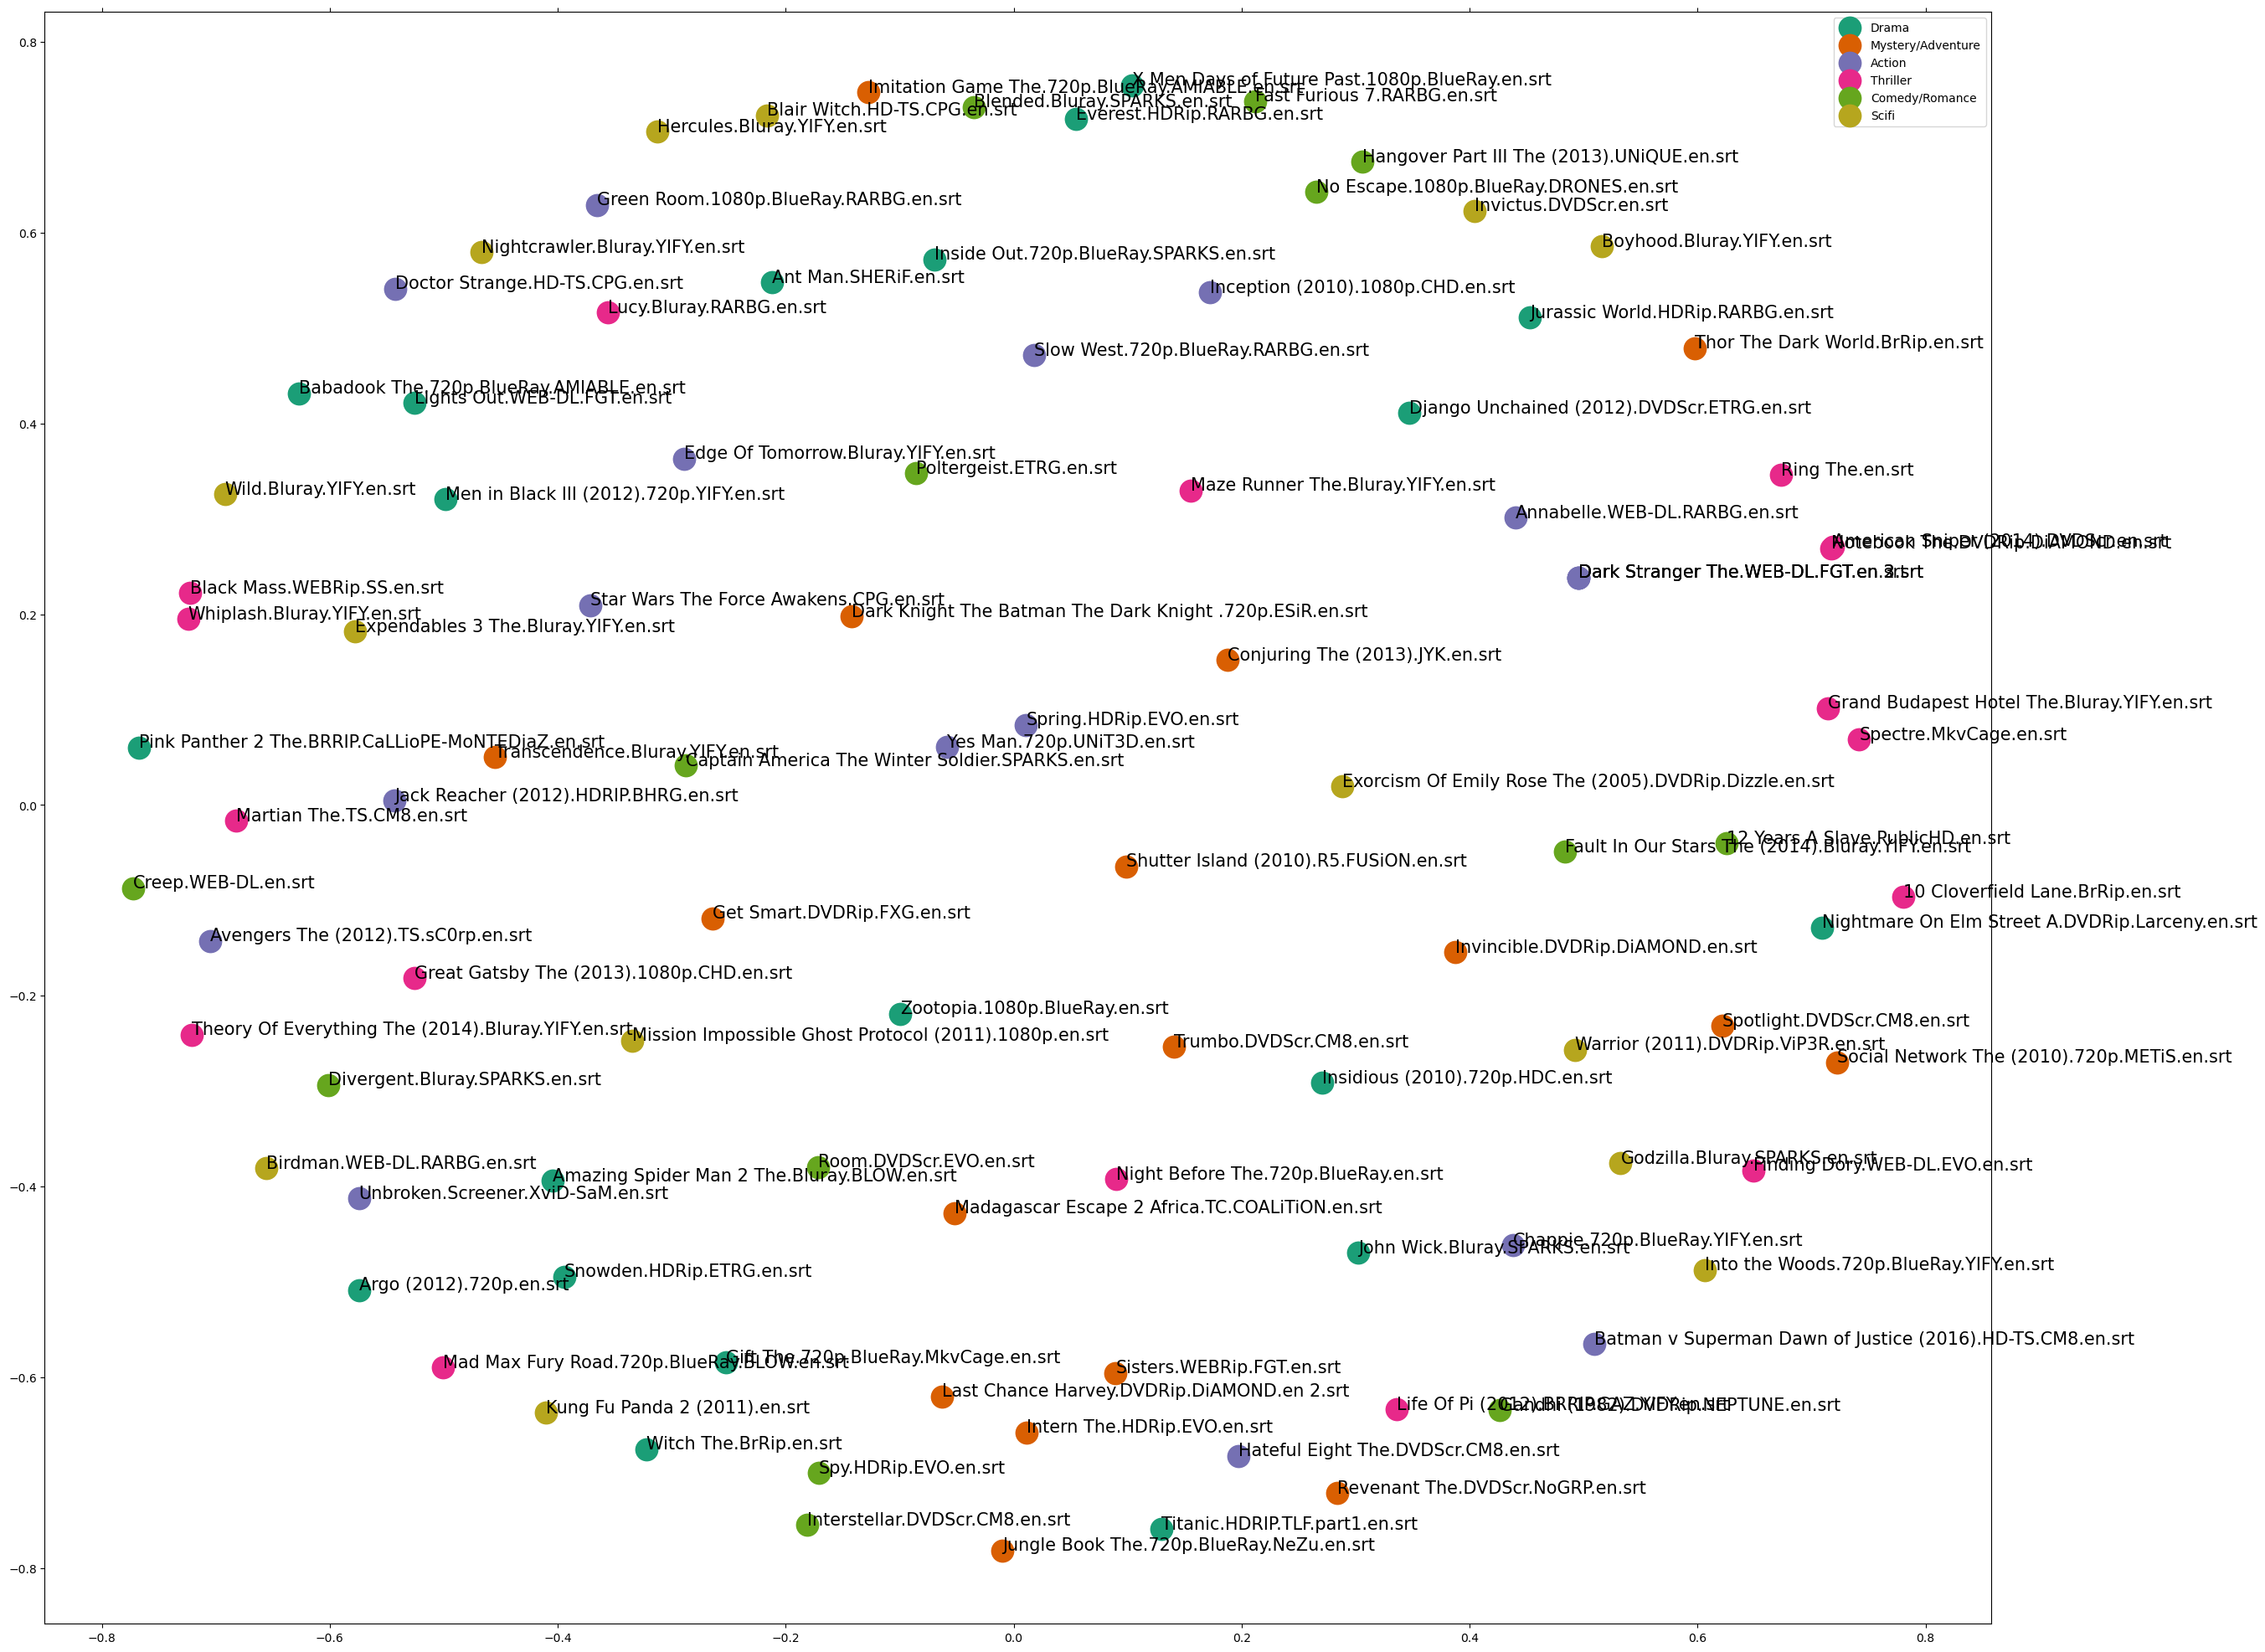

In [37]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame({'x':xs, 'y':ys , 'label': y_predk, 'title': movie_labels}) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(30, 25)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=20, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=15)  

    
    
plt.show() #show the plot



In [38]:
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 400);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [39]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame({'x':xs, 'y':ys , 'label': y_predk, 'title': movie_labels})  

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -150px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(16,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=20, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

## Random forest Classifier

In [40]:
X_train, X_test, y_train, y_test = train_test_split(movies_list,movies_y,random_state=4)

In [41]:
cv = CountVectorizer()
cv.fit(X_train)

CountVectorizer()

In [42]:
X_train,X_test = cv.transform(X_train),cv.transform(X_test)

In [43]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
rfc.score(X_test,y_test)

0.24

## Confusion Matrix

In [44]:
pd.DataFrame(metrics.confusion_matrix(y_test,y_pred),columns = ['Drama(0)','Mystery/Adventure(1)','Action(2)','Thriller(3)','Comedy/Romance(4)','Scifi(5)'])

Drama(0)  Mystery/Adventure(1)  Action(2)  Thriller(3)  Comedy/Romance(4)  \
0         1                     1          1            0                  3   
1         1                     2          1            0                  1   
2         1                     1          1            0                  1   
3         1                     2          2            0                  0   
4         0                     0          0            1                  2   
5         0                     0          2            0                  0   

   Scifi(5)  
0         0  
1         0  
2         0  
3         0  
4         0  
5         0

## ROC Curve

In [45]:
y = label_binarize(movies_y, classes=[0, 1, 2, 3, 4, 5])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(movies_list, y, test_size=.5,
                                                  random_state=0)
cv = CountVectorizer()
cv.fit(X_train)
X_train,X_test = cv.transform(X_train),cv.transform(X_test)

In [46]:
classifier = OneVsRestClassifier(RandomForestClassifier())
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
#y_score[:,0]

In [47]:
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:,i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

In [48]:
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

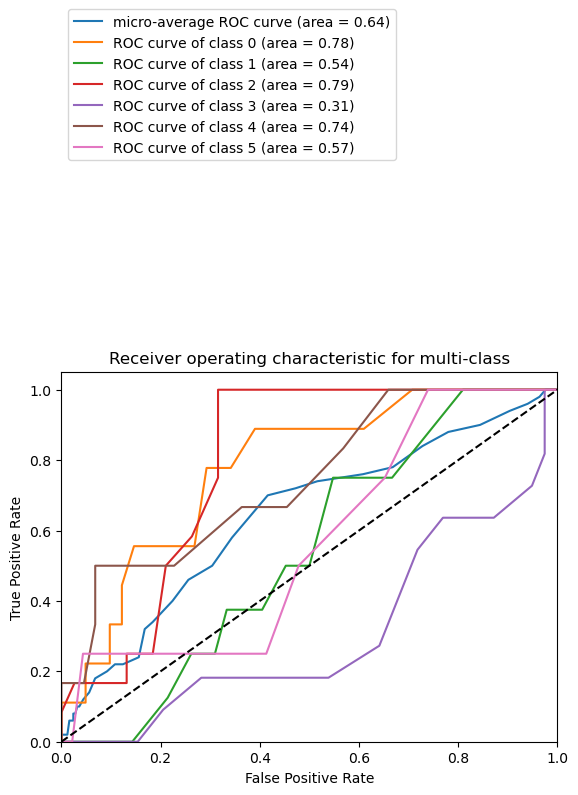

In [49]:
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(bbox_to_anchor=(0, 2), loc='upper left', ncol=1)
plt.show()

## Grid Search on random forests

In [50]:
cv = CountVectorizer()
cv.fit(movies_list)
movies_list_trans = cv.transform(movies_list)

In [51]:
param_grid = { "n_estimators"      : [250, 1000],
           "criterion"         : ["gini", "entropy"],
           "max_features"      : [3,4,5],
           "max_depth"         : [10, 20],
           "min_samples_split" : [2, 4] ,
           "bootstrap": [True, False]}

In [52]:
grid_search = GridSearchCV(rfc, param_grid, n_jobs=-1, cv=2)
grid_search.fit(movies_list_trans, movies_y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 3, 'min_samples_split': 4, 'n_estimators': 1000}
0.37


## Randomized Search on Random Forest 

In [53]:
rand = RandomizedSearchCV(rfc, param_grid, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(movies_list_trans, movies_y)
# rand.grid_scores_
print(rand.best_score_)
print(rand.best_params_)

0.36
{'n_estimators': 250, 'min_samples_split': 2, 'max_features': 5, 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}


## KNN Clustering

In [71]:
X_train, X_test, y_train, y_test = train_test_split(movies_list,movies_y,random_state=7)
cv = CountVectorizer()
cv.fit(X_train)
X_train,X_test = cv.transform(X_train),cv.transform(X_test)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))

0.28


In [72]:
k_range = list(range(1, 70))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(knn.score(X_test, y_test))
#scores

Text(0, 0.5, 'Testing Accuracy')

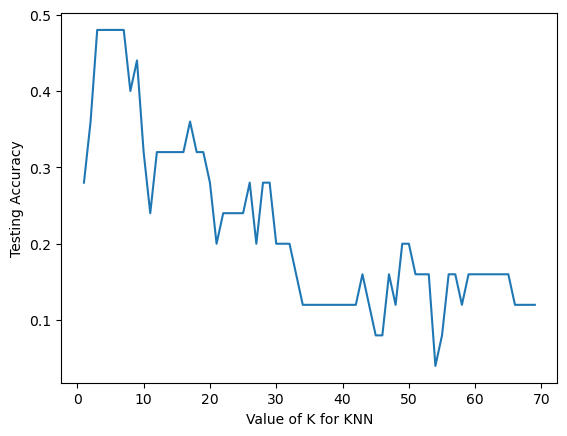

In [73]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


In [74]:
print("The best k value is",np.argmax(scores)+1)
bestval = np.argmax(scores)+1

The best k value is 3


In [75]:
X_train, X_test, y_train, y_test = train_test_split(movies_list,movies_y,random_state=7)
cv = CountVectorizer()
cv.fit(X_train)
X_train,X_test = cv.transform(X_train),cv.transform(X_test)
knn = KNeighborsClassifier(n_neighbors = bestval)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test,y_test))

0.48


## Confusion Matrix

In [76]:
pd.DataFrame(metrics.confusion_matrix(y_test,y_pred),columns = ['Drama(0)','Mystery/Adventure(1)','Action(2)','Thriller(3)','Comedy/Romance(4)','Scifi(5)'])

Drama(0)  Mystery/Adventure(1)  Action(2)  Thriller(3)  Comedy/Romance(4)  \
0         4                     0          1            0                  0   
1         1                     1          1            1                  1   
2         1                     0          2            0                  1   
3         1                     0          0            2                  0   
4         0                     1          0            1                  3   
5         0                     0          0            0                  0   

   Scifi(5)  
0         0  
1         1  
2         2  
3         0  
4         0  
5         0

## ROC curve

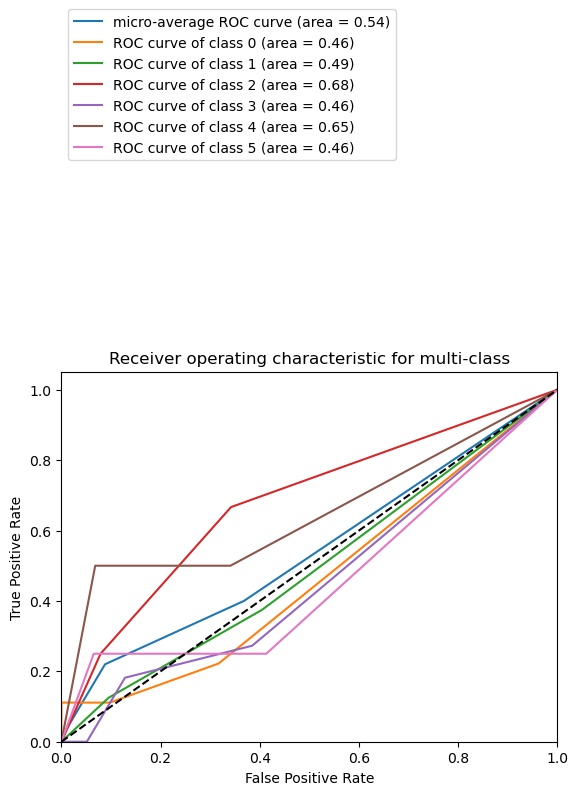

In [77]:
y = label_binarize(movies_y, classes=[0, 1, 2, 3, 4, 5])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(movies_list, y, test_size=.5,
                                                  random_state=0)
cv = CountVectorizer()
cv.fit(X_train)
X_train,X_test = cv.transform(X_train),cv.transform(X_test)
classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors = bestval))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
#y_score[:,0]
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:,i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(bbox_to_anchor=(0, 2), loc='upper left', ncol=1)
plt.show()

## Decision Tree Classifier

In [78]:
X_train, X_test, y_train, y_test = train_test_split(movies_list,movies_y,random_state=7)
cv = CountVectorizer()
cv.fit(X_train)
X_train,X_test = cv.transform(X_train),cv.transform(X_test)
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(dtc.score(X_test,y_test))

0.44


## Grid search CV Decision Tree 

In [79]:
parameters={'min_samples_split' : [20,50,80],'max_depth': [5,6,7,8]}
grid_search = GridSearchCV(dtc, parameters, n_jobs=-1, cv=2)
grid_search.fit(movies_list_trans, movies_y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 5, 'min_samples_split': 20}
0.28


## Confusion Matrix

In [80]:
pd.DataFrame(metrics.confusion_matrix(y_test,y_pred),columns = ['Drama(0)','Mystery/Adventure(1)','Action(2)','Thriller(3)','Comedy/Romance(4)','Scifi(5)'])

Drama(0)  Mystery/Adventure(1)  Action(2)  Thriller(3)  Comedy/Romance(4)  \
0         4                     0          1            0                  0   
1         1                     1          1            1                  1   
2         1                     0          2            0                  1   
3         1                     0          0            2                  0   
4         0                     1          0            1                  3   
5         0                     0          0            0                  0   

   Scifi(5)  
0         0  
1         1  
2         2  
3         0  
4         0  
5         0

## ROC Curve

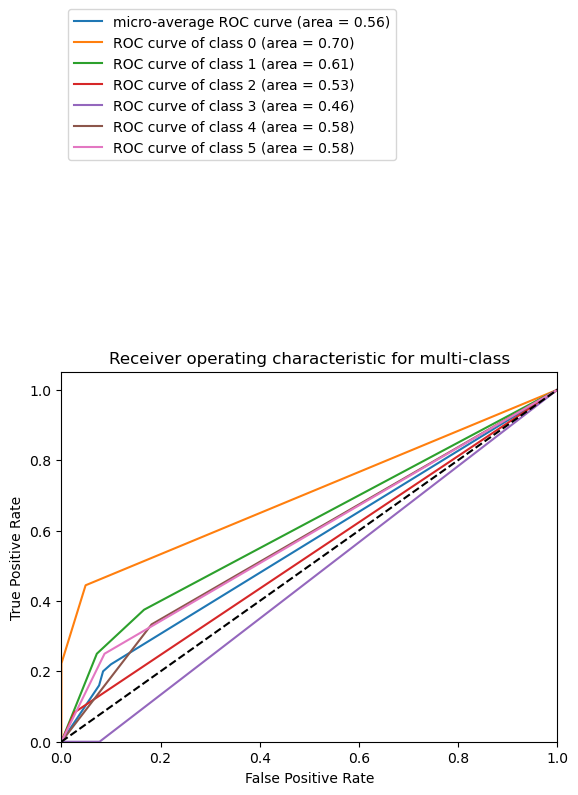

In [81]:
y = label_binarize(movies_y, classes=[0, 1, 2, 3, 4, 5])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(movies_list, y, test_size=.5,
                                                  random_state=0)
cv = CountVectorizer()
cv.fit(X_train)
X_train,X_test = cv.transform(X_train),cv.transform(X_test)
classifier = OneVsRestClassifier(DecisionTreeClassifier(min_samples_split = 20, max_depth= 5))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
#y_score[:,0]
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:,i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(bbox_to_anchor=(0, 2), loc='upper left', ncol=1)
plt.show()

## Logistic Regression CV 

In [82]:
X_train, X_test, y_train, y_test = train_test_split(movies_list,movies_y,random_state=7)
cv = CountVectorizer()
cv.fit(X_train)
X_train,X_test = cv.transform(X_train),cv.transform(X_test)
lr = LogisticRegressionCV()
lr.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(lr.score(X_test,y_test))

0.48


## Confusion Matrix

In [83]:
pd.DataFrame(metrics.confusion_matrix(y_test,y_pred),columns = ['Drama(0)','Mystery/Adventure(1)','Action(2)','Thriller(3)','Comedy/Romance(4)','Scifi(5)'])

Drama(0)  Mystery/Adventure(1)  Action(2)  Thriller(3)  Comedy/Romance(4)  \
0         4                     0          1            0                  0   
1         1                     1          1            1                  1   
2         1                     0          2            0                  1   
3         1                     0          0            2                  0   
4         0                     1          0            1                  3   
5         0                     0          0            0                  0   

   Scifi(5)  
0         0  
1         1  
2         2  
3         0  
4         0  
5         0

## ROC Curve

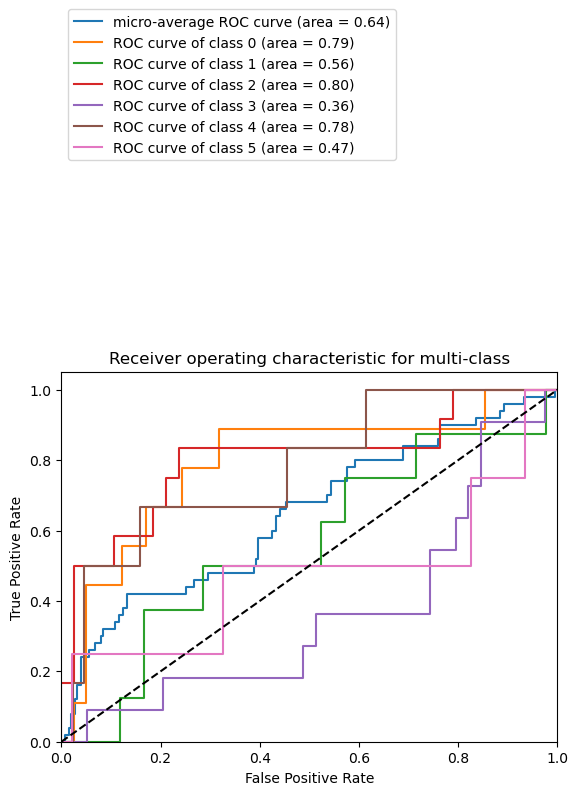

In [84]:
y = label_binarize(movies_y, classes=[0, 1, 2, 3, 4, 5])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(movies_list, y, test_size=.5,
                                                  random_state=0)
cv = CountVectorizer()
cv.fit(X_train)
X_train,X_test = cv.transform(X_train),cv.transform(X_test)
classifier = OneVsRestClassifier(LogisticRegressionCV())
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
#y_score[:,0]
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:,i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(bbox_to_anchor=(0, 2), loc='upper left', ncol=1)
plt.show()

## DOC2VEC

In [85]:
docLabels = []
docLabels = movies_y
Counter(docLabels)
# ///////////////////////////////////////////////////////////////////////////////////////
data = movies_list
docs = TaggedDocument(words=data,tags=docLabels)
total_exp=len(movies_list)
# ///////////////////////////////////////////////////////////////////////////////////////
class LabeledLineSentence(object):
    def __init__(self, doc_list, labels_list,total_exp):
        self.labels_list = labels_list
        self.doc_list = doc_list
        self.total_exp= total_exp
    def __iter__(self):
        for idx, doc in enumerate(self.doc_list):
            yield TaggedDocument(words=doc.split(),tags=[self.labels_list[idx]])
# ///////////////////////////////////////////////////////////////////////////////////////
it = LabeledLineSentence(data, docLabels,total_exp)
#it = DocIt(data, docLabels)
words = []
for i in it:
    #j = j+1
    words.append(i[0])

Counter({0: 20, 1: 18, 2: 20, 3: 18, 4: 15, 5: 9})

In [89]:
model = Doc2Vec(vector_size=100, window=10, min_count=5, workers=11,alpha=0.025, min_alpha=0.025) # use fixed learning rate
model.build_vocab(it)
model.train(it,total_examples=total_exp,epochs=5)
model.alpha -= 0.002 # decrease the learning rate
model.min_alpha = model.alpha # fix the learning rate, no deca
model.train(it,total_examples=total_exp,epochs=1)

In [90]:
doc_vecs = [model.infer_vector(words[i]) for i in range(0,len(words))]

In [91]:
model.save("doc2vec.model")

In [103]:
print(len(doc_vecs))
print(len(v))

100
100


In [94]:
dist = 1 - cosine_similarity(doc_vecs)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(movies_list,movies_y,random_state=9)
cv = CountVectorizer()
cv.fit(X_train)
X_train,X_test = cv.transform(X_train),cv.transform(X_test)
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [106]:
svm.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 4, 4])

In [96]:
dist

array([[ 5.9604645e-08,  5.0367796e-01,  4.4966161e-01, ...,
         1.4943701e-01,  3.6997652e-01,  4.2535341e-01],
       [ 5.0367796e-01,  2.9802322e-07,  5.7912374e-01, ...,
         5.4941308e-01,  7.4479413e-01,  5.9124339e-01],
       [ 4.4966161e-01,  5.7912374e-01,  1.7881393e-07, ...,
         4.7373867e-01,  5.7961971e-01,  3.0974299e-01],
       ...,
       [ 1.4943701e-01,  5.4941308e-01,  4.7373867e-01, ...,
        -2.3841858e-07,  3.5750884e-01,  3.8866532e-01],
       [ 3.6997652e-01,  7.4479413e-01,  5.7961971e-01, ...,
         3.5750884e-01,  0.0000000e+00,  5.8708036e-01],
       [ 4.2535341e-01,  5.9124339e-01,  3.0974299e-01, ...,
         3.8866532e-01,  5.8708036e-01, -2.3841858e-07]], dtype=float32)

In [97]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [98]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e',5 : '#b6a61e' }

#set up cluster names using a dict
cluster_names = {0: 'Drama', 
                 1: 'Mystery/Adventure', 
                 2: 'Action', 
                 3: 'Thriller', 
                 4: 'Comedy/Romance',
                 5:'Scifi',
                  }

In [99]:
kmeans = KMeans(n_clusters=6).fit(doc_vecs)
y_pred = kmeans.predict(doc_vecs)
y_pred

array([2, 2, 5, 1, 3, 5, 3, 1, 3, 1, 4, 2, 5, 4, 2, 1, 1, 3, 3, 3, 2, 2,
       2, 5, 1, 1, 1, 2, 3, 3, 1, 4, 5, 2, 1, 5, 0, 2, 2, 3, 4, 5, 1, 3,
       1, 4, 5, 4, 0, 5, 2, 2, 1, 3, 5, 0, 4, 4, 2, 5, 1, 0, 5, 0, 0, 0,
       1, 4, 2, 5, 3, 4, 4, 3, 3, 5, 2, 3, 4, 1, 3, 2, 1, 2, 0, 1, 5, 4,
       5, 4, 3, 3, 1, 1, 2, 2, 5, 2, 4, 5])

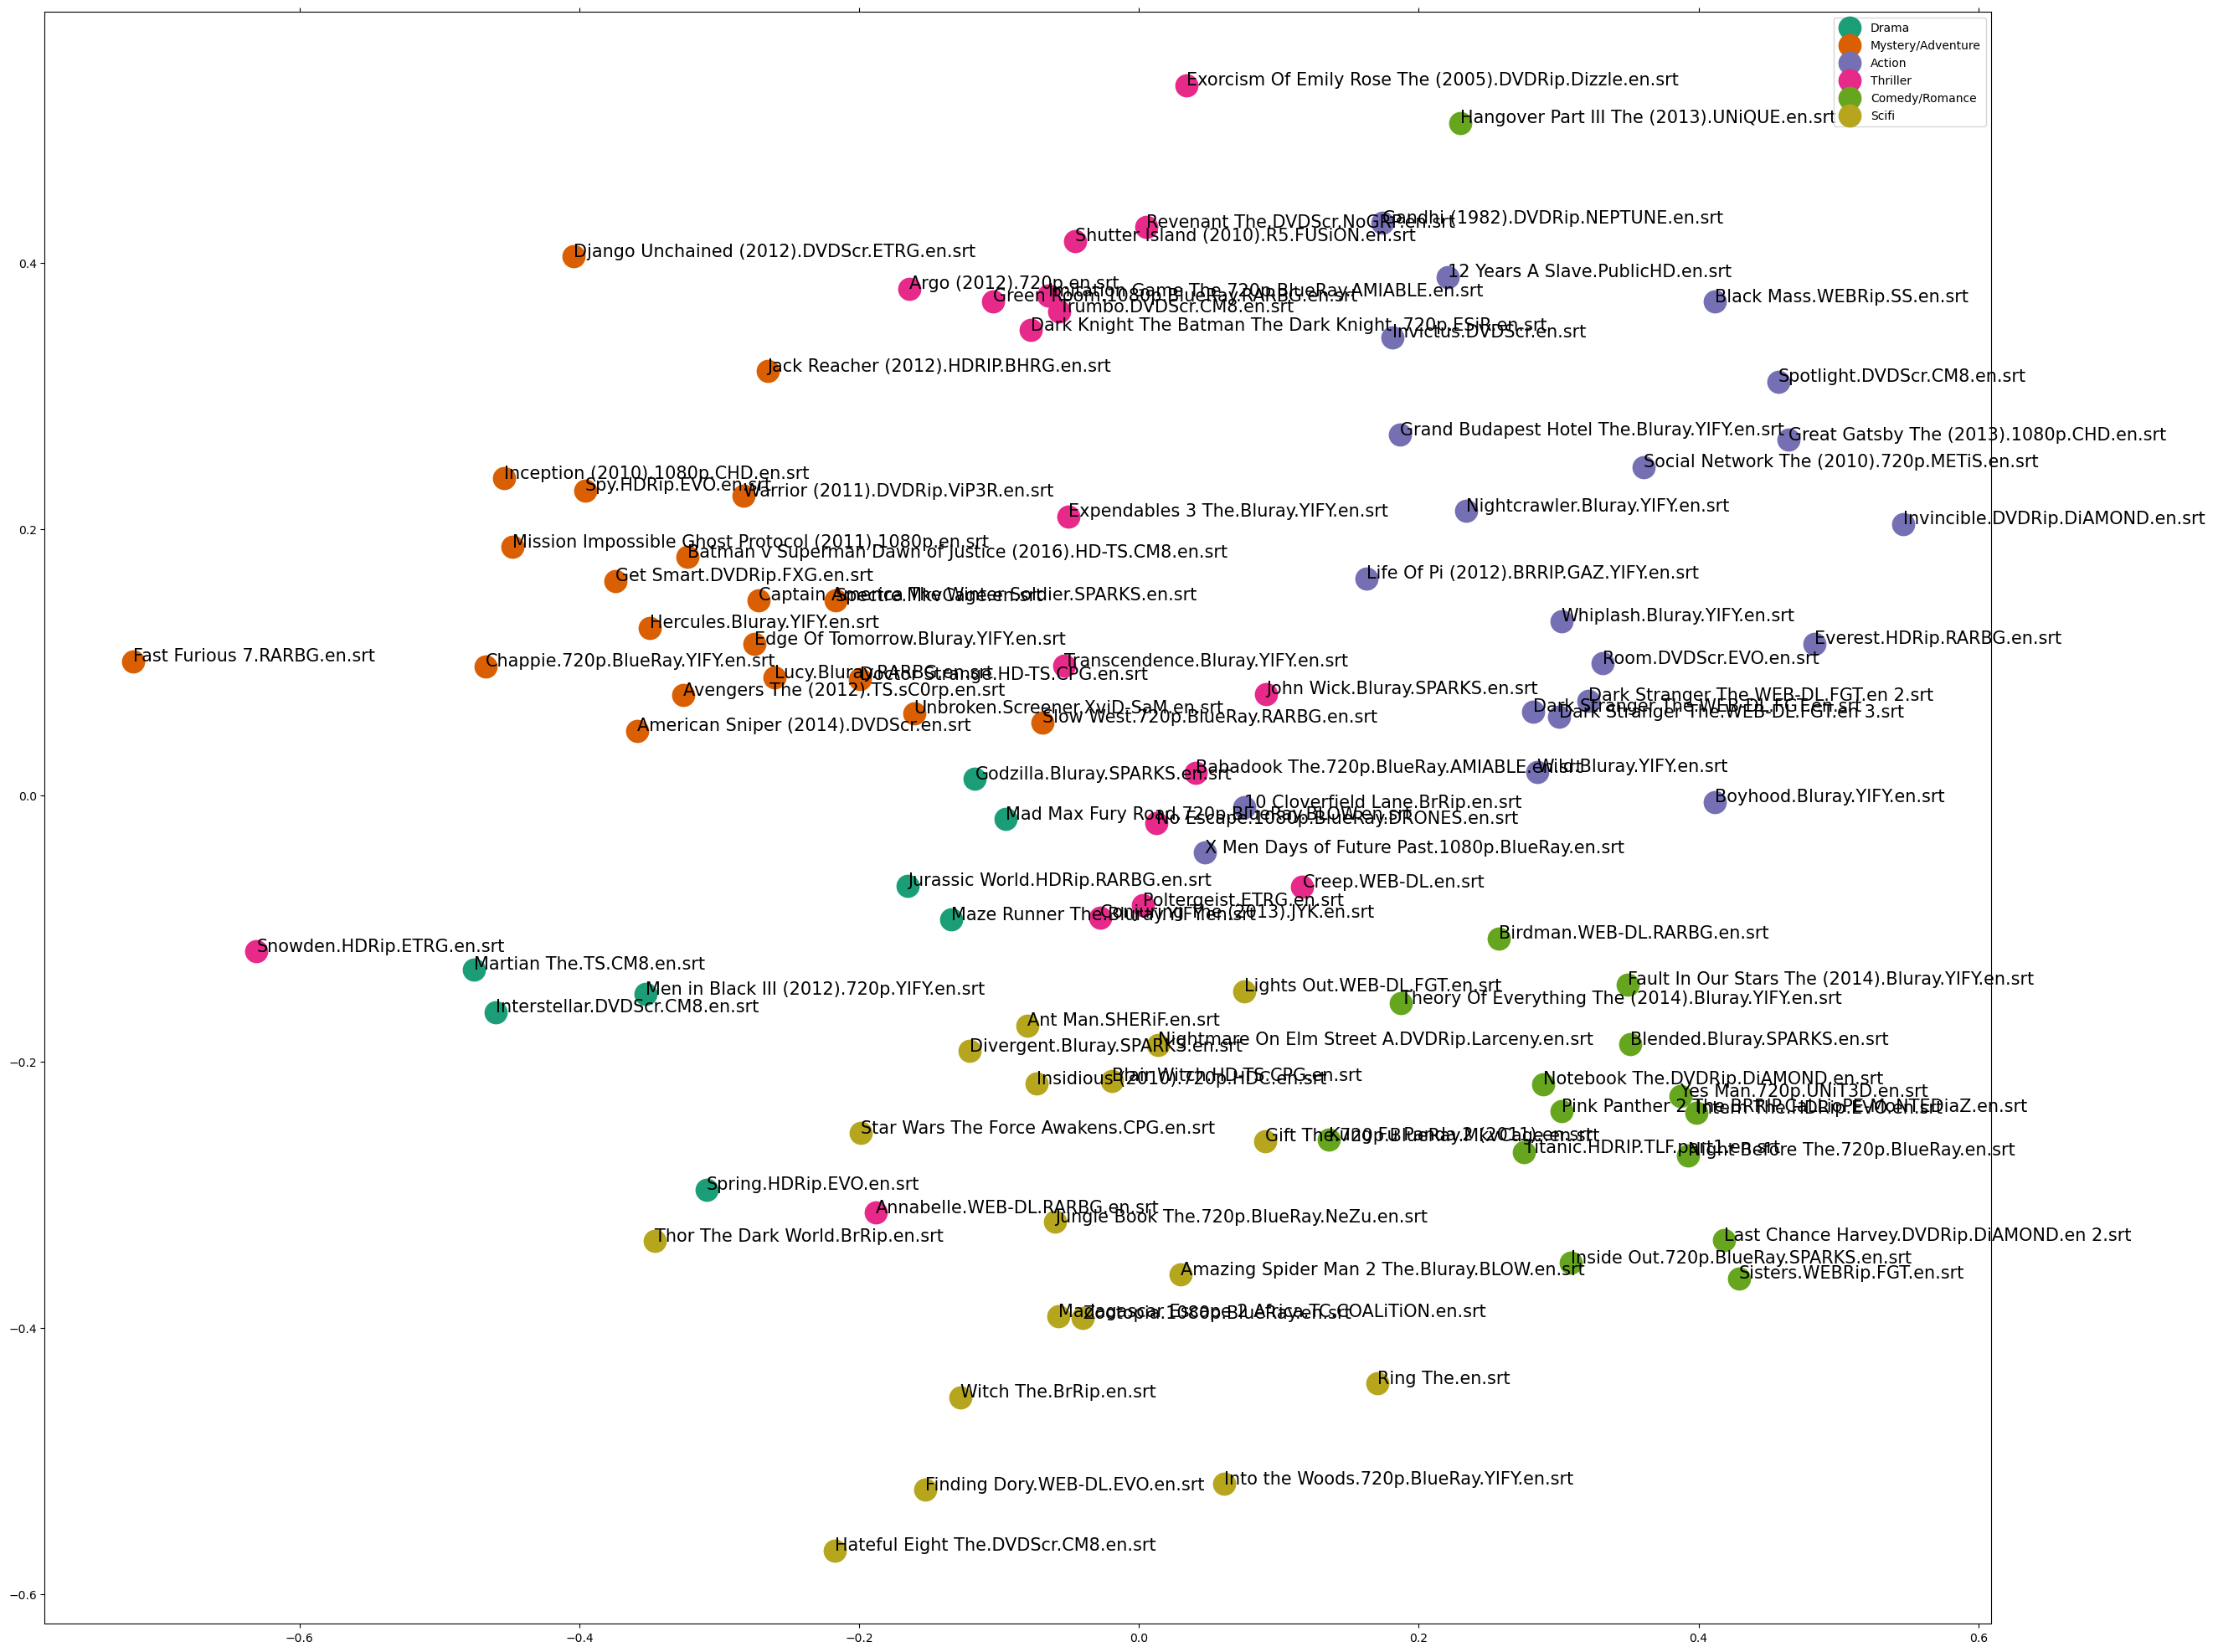

In [100]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame({'x':xs, 'y':ys , 'label': y_pred, 'title': movie_labels})  
#group by cluster
groups = df.groupby('label')
# set up plot
fig, ax = plt.subplots(figsize=(30, 25)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
#iterate through groups to layer the plot
#use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=20, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=15)  

    
    
plt.show() #show the plot

In [101]:
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 400);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [102]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame({'x':xs, 'y': ys, 'label': y_pred, 'title' : movie_labels}) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -150px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(16,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=20, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot



# Testing 

In [ ]:
model = Doc2Vec.load('doc2vec.model')


In [146]:
movies_list_test = []
movie_labels_test = []
def preprocessing(path):
    x = []

    import re
    import glob
    for filename in glob.glob(path+'*.srt'):
        movie_labels_test.append(filename)
        with open(filename, encoding="utf-8") as f:
            print(filename)
            data = ''.join(i for i in f.read() if not i.isdigit())
            txt = data.split("\n")
            filtered = filter(lambda x: not re.match(r'^\s*$', x), txt)
        for line in filtered:
            line = re.sub(r'::, --> ::,','', line)
            line = re.sub(r'<font color="#ffff" size=>www.moviesubtitles.org</font>','',line)
            line = re.sub(r'\ufeff','', line)
            line = re.sub(r'Subtitle created by <font color="#ffff">- Aorion -</font>','',line)
            line = re.sub(r'</font>','', line)
            line = re.sub(r'<font color="#ffba">','', line)
            line = re.sub(r'<i>','', line)
            line = re.sub(r'</i>','', line)
            line = re.sub(r'Translated by Has_World','',line)
            x.append(line)
            h = " ".join(line for line in x)
        movies_list_test.append(h)
        x = []
   

In [147]:
preprocessing("testing/")
print(movies_list_test)

testing\Batman.and.Superman.Battle.of.the.Super.Sons.2022.720p.BluRay.x264.AAC-English.srt
testing\Titanic.HDRIP.TLF.part2.en.srt
testing\Titanic.HDRIP.TLF.part3.en.srt
['  It won\'t be long now.  Structural integrity has passed the point of no return.  I just need to put in the final calculations.  There has to be another way.  This is the only way.  My son, someday I pray you\'ll have a child  that will bring you as much joy as you have brought us.  Even in this short time, you have changed our lives for the better.  We love you with all that we are.  Goodbye, my son.  It is time.  Trans-light engines activated in three, two, one.  "In the decade of the s,  even the great city of Metropolis was not spared  the ravages of worldwide depression.  In the times of fear and confusion, the job of informing the public  was the responsibility of the Daily Planet."  Somebody kill me.  Why couldn\'t you guys be, I don\'t know, like, doctors or lawyers,  or, like, a celebrity chef?  Yeah, like, 

['  It won\'t be long now.  Structural integrity has passed the point of no return.  I just need to put in the final calculations.  There has to be another way.  This is the only way.  My son, someday I pray you\'ll have a child  that will bring you as much joy as you have brought us.  Even in this short time, you have changed our lives for the better.  We love you with all that we are.  Goodbye, my son.  It is time.  Trans-light engines activated in three, two, one.  "In the decade of the s,  even the great city of Metropolis was not spared  the ravages of worldwide depression.  In the times of fear and confusion, the job of informing the public  was the responsibility of the Daily Planet."  Somebody kill me.  Why couldn\'t you guys be, I don\'t know, like, doctors or lawyers,  or, like, a celebrity chef?  Yeah, like, anything besides reporters.  Because reporting is an important and essential part of a civilized society.  They call it the fifth branch of government.  Or is it the fou

In [148]:
docLabels = []
docLabels = movies_y
Counter(docLabels)
# ///////////////////////////////////////////////////////////////////////////////////////
data = movies_list
docs = TaggedDocument(words=data,tags=docLabels)
total_exp=len(movies_list)
# ///////////////////////////////////////////////////////////////////////////////////////
class LabeledLineSentence(object):
    def __init__(self, doc_list, labels_list,total_exp):
        self.labels_list = labels_list
        self.doc_list = doc_list
        self.total_exp= total_exp
    def __iter__(self):
        for idx, doc in enumerate(self.doc_list):
            yield TaggedDocument(words=doc.split(),tags=[self.labels_list[idx]])
# ///////////////////////////////////////////////////////////////////////////////////////
it = LabeledLineSentence(data, docLabels,total_exp)
#it = DocIt(data, docLabels)
words = []
for i in it:
    #j = j+1
    words.append(i[0])

In [153]:
model = Doc2Vec.load('doc2vec.model')
doc_vecs = [model.infer_vector(words[i]) for i in range(0,len(words))]
dist = 1 - cosine_similarity(doc_vecs)
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)  
xs, ys = pos[:, 0], pos[:, 1]

cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e',5 : '#b6a61e' }
cluster_names = {0: 'Drama', 
                 1: 'Mystery/Adventure', 
                 2: 'Action', 
                 3: 'Thriller', 
                 4: 'Comedy/Romance',
                 5:'Scifi',
                  }
y_pred = kmeans.predict(doc_vecs)
y_pred

array([2, 2, 5, 1, 3, 5, 3, 1, 3, 1, 4, 2, 5, 4, 2, 1, 1, 3, 3, 3, 2, 2,
       2, 5, 1, 1, 1, 2, 3, 3, 1, 4, 5, 2, 1, 5, 0, 2, 2, 3, 4, 5, 1, 3,
       1, 4, 5, 4, 0, 5, 2, 2, 1, 3, 5, 0, 4, 4, 2, 5, 1, 0, 5, 0, 0, 0,
       1, 4, 2, 5, 3, 4, 4, 3, 3, 5, 2, 3, 4, 1, 3, 2, 1, 2, 0, 1, 5, 4,
       5, 4, 3, 3, 1, 1, 2, 2, 5, 2, 4, 5])